# GAMA - Gasoline Market Sentiment Price Forecaster
Summary:
<br>This project uses the gasoline_price_sentiment.xlsx dataset to predict the price of gasoline given a variety of features.
Each row is a day between the year 2010 and 2018, starting from 1st January 2010, until 31st December 2018.

## Early Analysis

In [48]:
import pandas as pd
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Import Dataset and View the Rows / Columns

In [49]:
df = pd.read_excel("../Data/gasoline_price_sentiment.xlsx", "data_combined")
del df["commodity"]

In [50]:
#Remove commodity column because we can just assume all work in this project involves gasoline.
df.head(5)

,Date,price,popularity,general_sentiment,positive_outlook,happiness,bittersweet,confidence,disgust,disagreement,...,priceTrend,pricePrediction,volatile,consumptionCommodity,productionCommodity,regulatory,supplyDemandBalance,supplyDemandBalanceForecast,exploration,accidents
0,2010-01-01,NaN,512.0,-0.274504,-0.045092,NaN,NaN,0.002457,0.019614,0.049026,...,0.000986,0.000006,0.062751,-0.007837,0.005888,NaN,-0.060778,0.000006,NaN,NaN
1,2010-01-02,NaN,290.4,-0.074531,-0.057194,0.017355,-0.003449,-0.009517,0.017355,-0.020786,...,0.000018,0.003485,0.016315,0.000018,0.005219,NaN,-0.020786,-0.005183,NaN,NaN
2,2010-01-03,NaN,230.9,-0.139801,-0.028399,0.008735,-0.008739,-0.000548,0.008735,0.061160,...,0.013104,0.004367,0.093489,0.008735,0.017473,NaN,-0.019661,-0.000002,NaN,NaN
3,2010-01-04,87.240684,1261.1,-0.040896,-0.036131,0.002389,0.000800,0.002389,0.002786,0.011522,...,0.056395,0.013508,0.047341,0.002786,0.006360,NaN,0.083796,NaN,0.001594,NaN
4,2010-01-05,88.983266,1902.5,-0.005005,-0.035786,0.004993,0.002625,-0.000795,0.002099,0.008676,...,0.067871,0.010518,0.056821,-0.001058,0.006834,0.001046,0.037090,0.000520,NaN,0.00052


In [51]:
df.shape

(3287, 30)

In [52]:
df.columns

Index(['Date', 'price', 'popularity', 'general_sentiment', 'positive_outlook',
       'happiness', 'bittersweet', 'confidence', 'disgust', 'disagreement',
       'anxiety', 'gloominess', 'distress', 'violent', 'unexpectedness',
       'timeliness', 'confusion', 'feelingsVsTruth', 'buyVsSell',
       'buyVsSellForecast', 'priceTrend', 'pricePrediction', 'volatile',
       'consumptionCommodity', 'productionCommodity', 'regulatory',
       'supplyDemandBalance', 'supplyDemandBalanceForecast', 'exploration',
       'accidents'],
      dtype='object')

In [53]:
df.dtypes

Date                           datetime64[ns]
price                                 float64
popularity                            float64
general_sentiment                     float64
positive_outlook                      float64
happiness                             float64
bittersweet                           float64
confidence                            float64
disgust                               float64
disagreement                          float64
anxiety                               float64
gloominess                            float64
distress                              float64
violent                               float64
unexpectedness                        float64
timeliness                            float64
confusion                             float64
feelingsVsTruth                       float64
buyVsSell                             float64
buyVsSellForecast                     float64
priceTrend                            float64
pricePrediction                   

### Missing Values

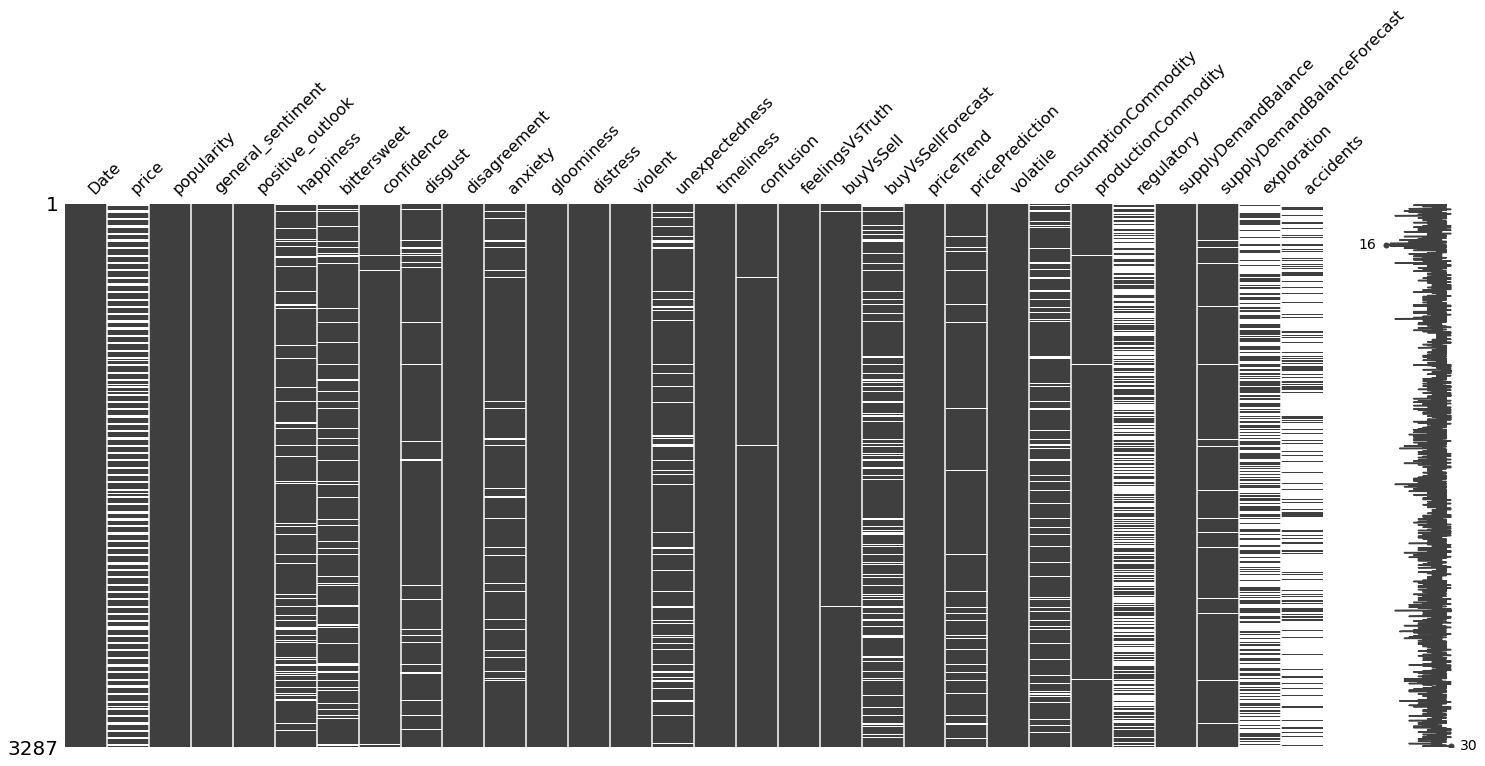

In [54]:
msno.matrix(df)
plt.show()

In [55]:
df.isna().sum()

Date                              0
price                          1035
popularity                        0
general_sentiment                 0
positive_outlook                  0
happiness                       379
bittersweet                     308
confidence                       14
disgust                         181
disagreement                      0
anxiety                         137
gloominess                        1
distress                          0
violent                           4
unexpectedness                  304
timeliness                        0
confusion                        16
feelingsVsTruth                   0
buyVsSell                         7
buyVsSellForecast               478
priceTrend                        2
pricePrediction                 142
volatile                          0
consumptionCommodity            352
productionCommodity              11
regulatory                     1739
supplyDemandBalance               1
supplyDemandBalanceForecast 

Number columns with missingess: 21
Columns with missingness
['price', 'happiness', 'bittersweet', 'confidence', 'disgust', 'anxiety', 'gloominess', 'violent', 'unexpectedness', 'confusion', 'buyVsSell', 'buyVsSellForecast', 'priceTrend', 'pricePrediction', 'consumptionCommodity', 'productionCommodity', 'regulatory', 'supplyDemandBalance', 'supplyDemandBalanceForecast', 'exploration', 'accidents']


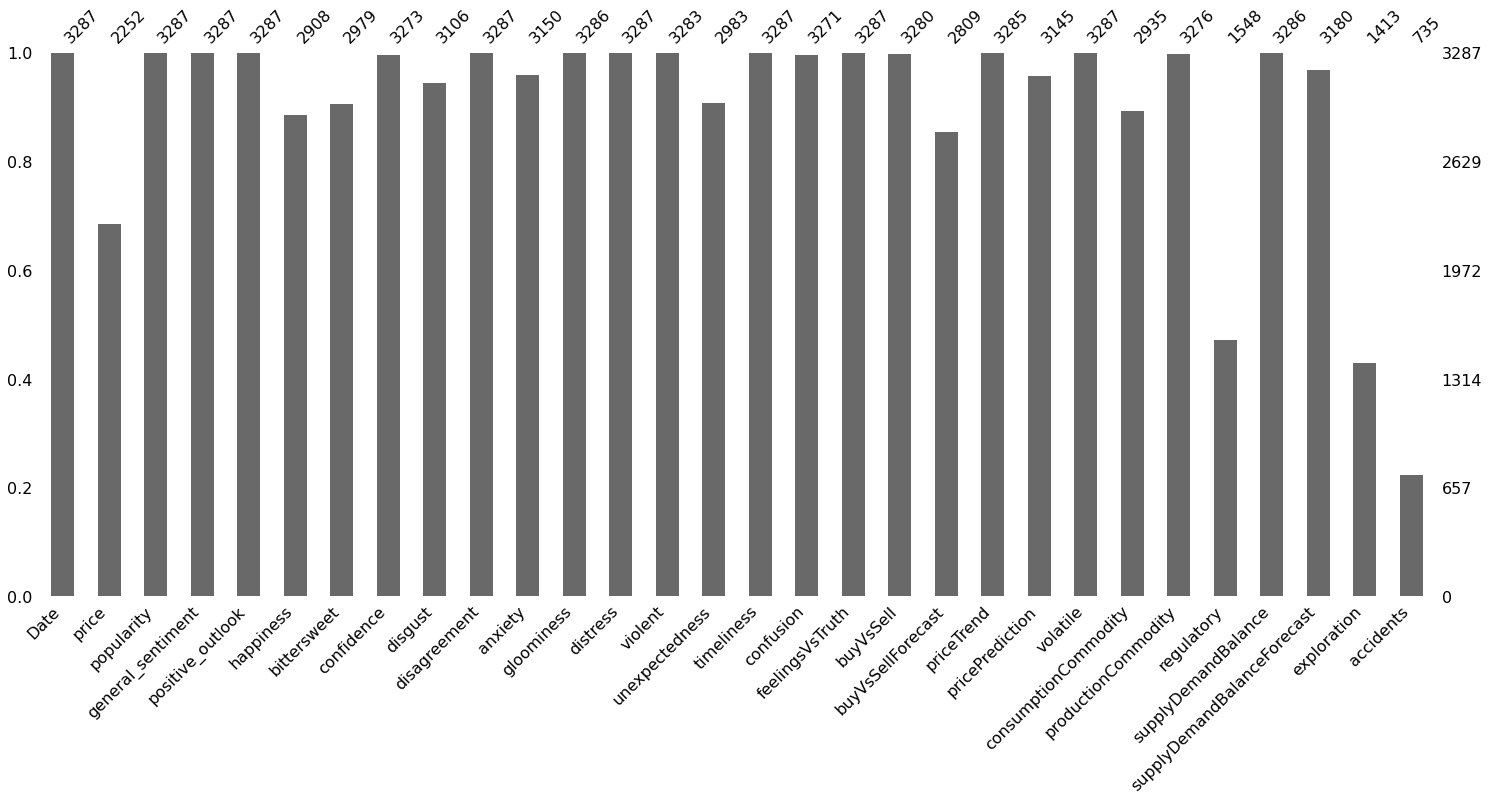

In [56]:
# Check for which columns that have missingness
# Columns with missingness
cols_missing = df.columns[df.isna().any()].to_list()
print(f"Number columns with missingess: {len(cols_missing)}")
print("Columns with missingness")
print(cols_missing)

# Visualise the amount of misingness in each columns
msno.bar(df)
plt.show()

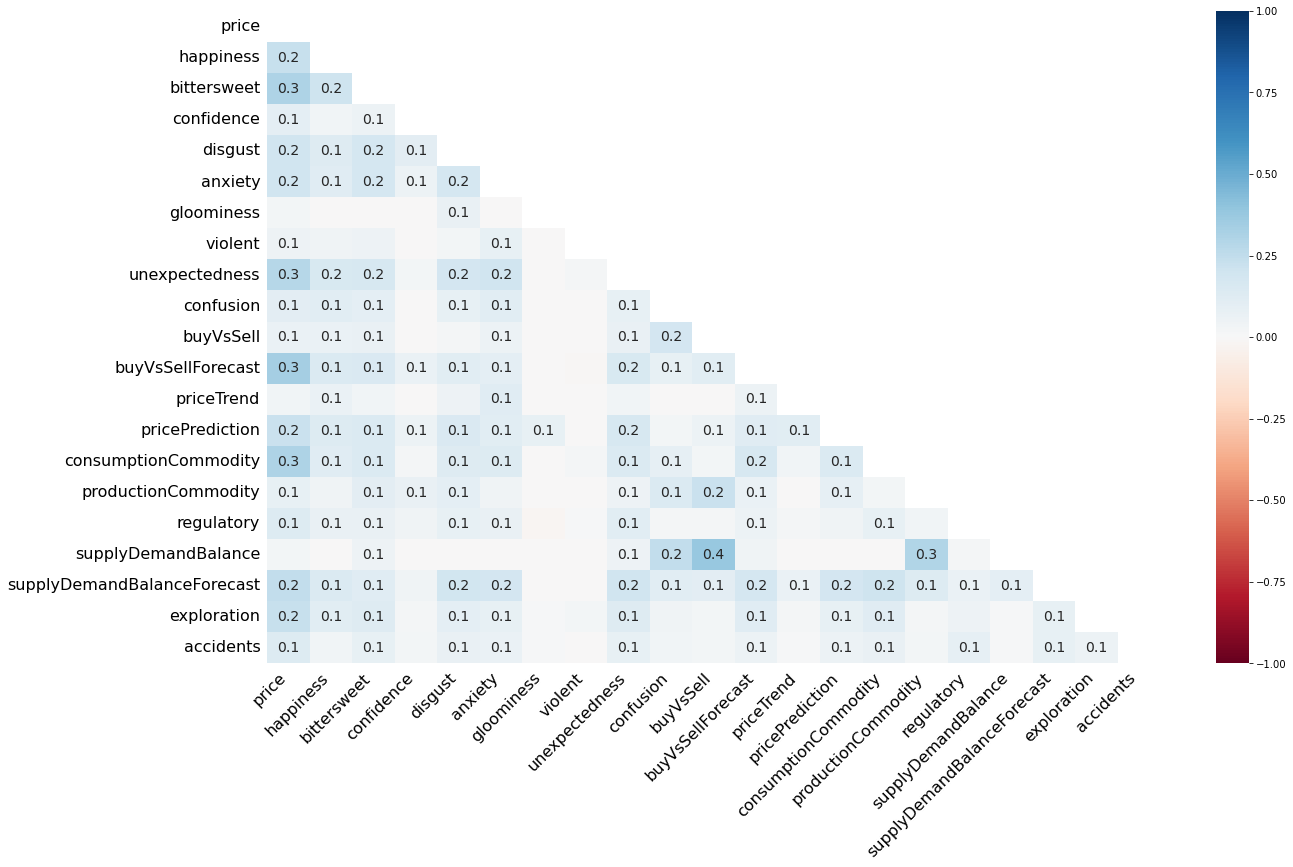

In [57]:
msno.heatmap(df)
plt.show()

### Skewness and Kurtosis

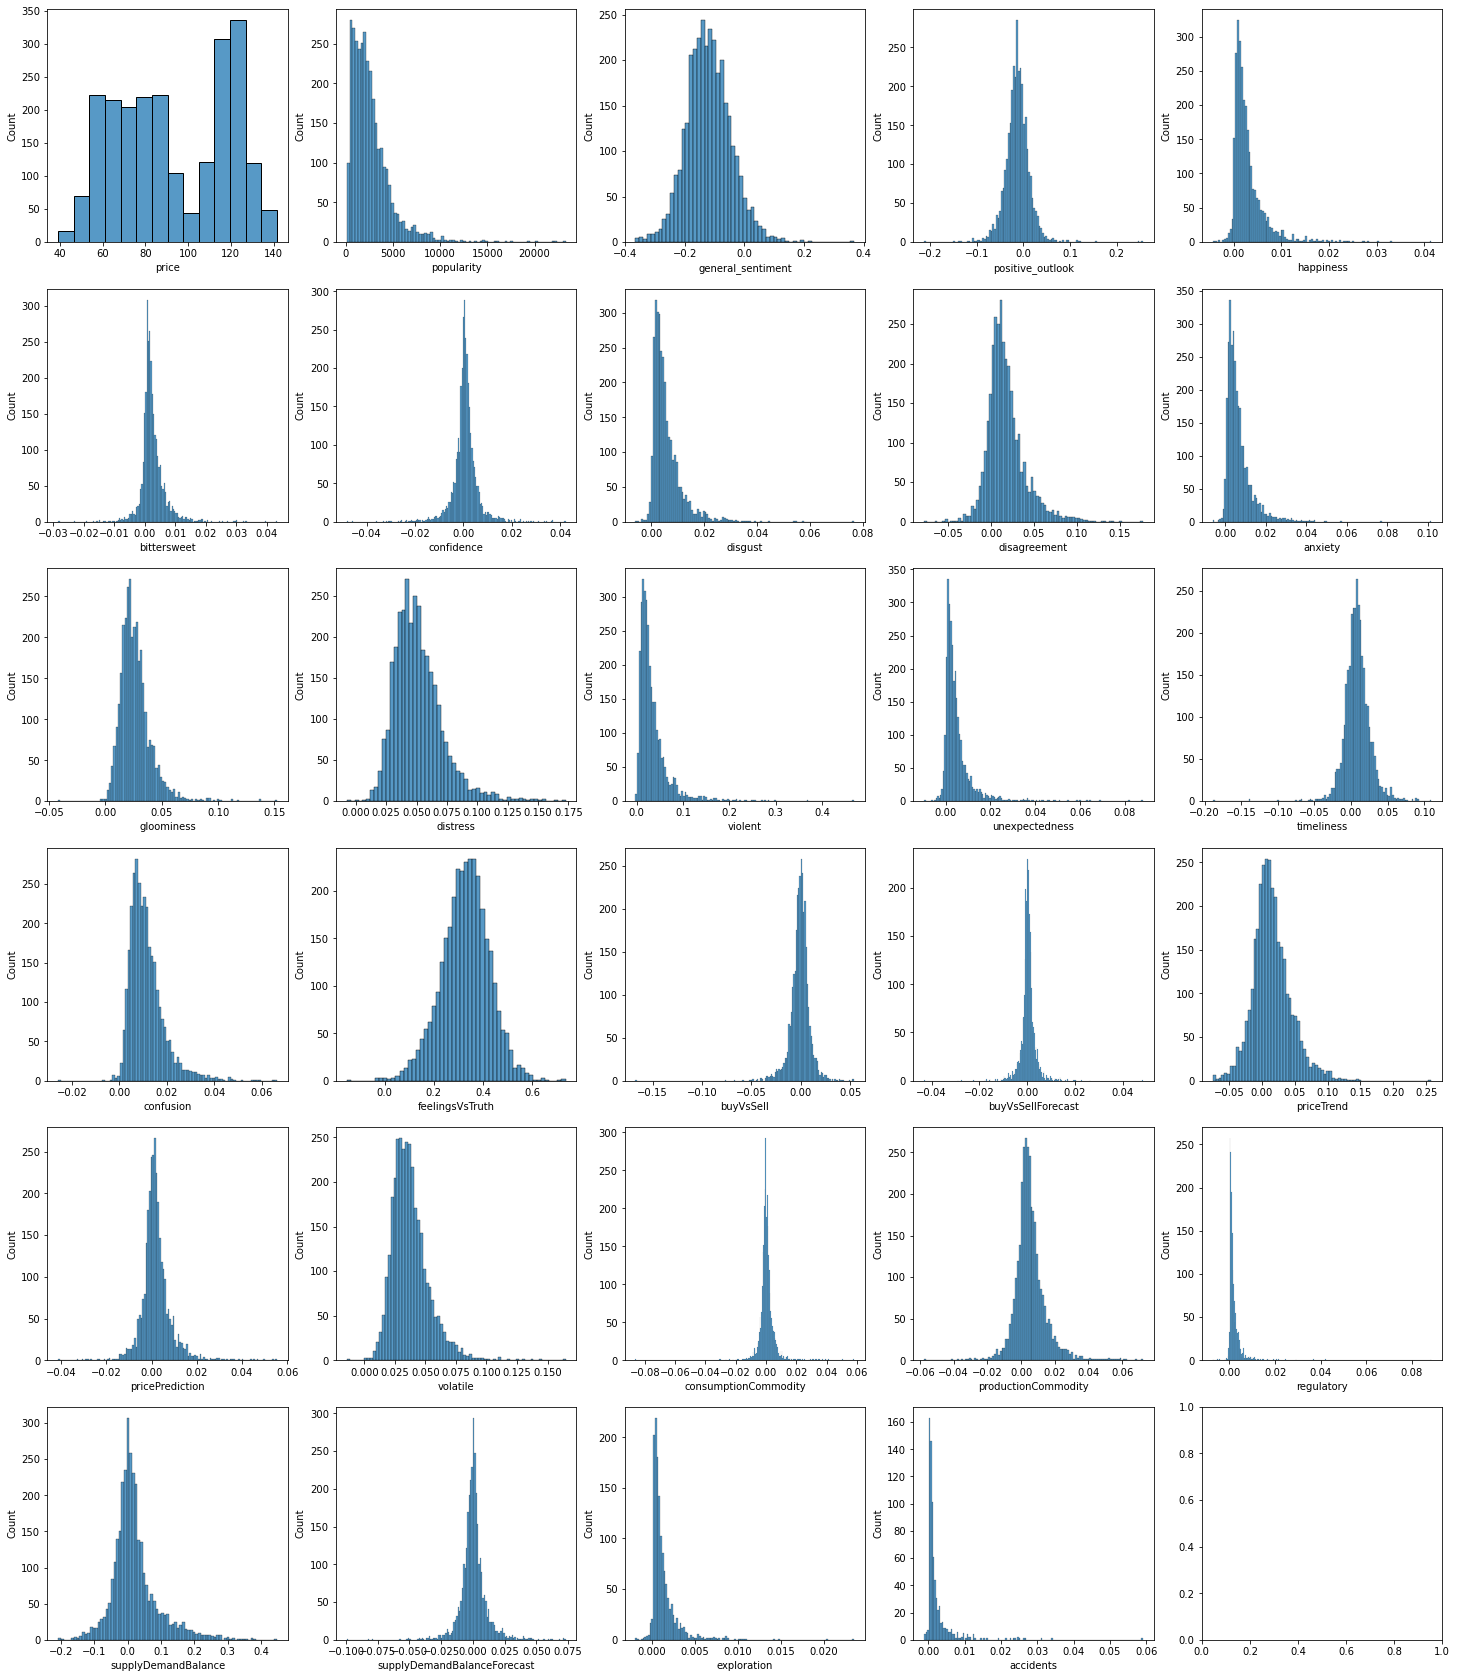

In [58]:
columnsNo = len(df.columns) / 5
rows = math.ceil(columnsNo)

fig, ax = plt.subplots(nrows = rows, ncols = 5, figsize = (25, 30))
ax = ax.flatten()

for i, var in enumerate(df.iloc[:, df.columns != 'Date'].iteritems()):
    sns.histplot(data= df, x= var[0], ax = ax[i])
    #ax[i].set_title(var[0])

In [59]:
df_skew  = df.copy()
del df_skew["Date"]

from scipy.stats import skew

for var in df_skew.iteritems():
    print("Skewness for {} is {}".format(var[0], skew(var[1], nan_policy= 'omit')))

Skewness for price is -0.008712772895106293
Skewness for popularity is 2.688565405256412
Skewness for general_sentiment is 0.29405928051821467
Skewness for positive_outlook is 0.5858033078429233
Skewness for happiness is 3.2513306477618182
Skewness for bittersweet is 1.7272420370757668
Skewness for confidence is -0.26966058058523384
Skewness for disgust is 3.0709467314172674
Skewness for disagreement is 1.293105488567805
Skewness for anxiety is 3.3170495437288645
Skewness for gloominess is 1.835446272590075
Skewness for distress is 1.2717534537679729
Skewness for violent is 3.522056002776818
Skewness for unexpectedness is 4.242727724079467
Skewness for timeliness is -0.45603426124871205
Skewness for confusion is 1.7837124395410207
Skewness for feelingsVsTruth is -0.18198720441290997
Skewness for buyVsSell is -1.766697444535481
Skewness for buyVsSellForecast is 0.16858375168864626
Skewness for priceTrend is 0.7450629690238916
Skewness for pricePrediction is 1.411985261545558
Skewness fo

In [60]:
from scipy.stats import kurtosis 

for var in df_skew.iteritems():
    print("Kurtosis for {} is {}".format(var[0], kurtosis(var[1], nan_policy= 'omit')))

Kurtosis for price is -1.3984882733734423
Kurtosis for popularity is 13.813571036523342
Kurtosis for general_sentiment is 1.0073159324735874
Kurtosis for positive_outlook is 9.933614089624612
Kurtosis for happiness is 17.088323085543696
Kurtosis for bittersweet is 15.944476550215064
Kurtosis for confidence is 12.96161366596637
Kurtosis for disgust is 18.781080547700057
Kurtosis for disagreement is 4.0360714117978285
Kurtosis for anxiety is 23.920526852263798
Kurtosis for gloominess is 8.584633537841547
Kurtosis for distress is 3.1479267361679986
Kurtosis for violent is 21.352191460030944
Kurtosis for unexpectedness is 28.89093733656992
Kurtosis for timeliness is 10.194927427485542
Kurtosis for confusion is 6.124685760221668
Kurtosis for feelingsVsTruth is 0.6548978043435749
Kurtosis for buyVsSell is 25.22780389255386
Kurtosis for buyVsSellForecast is 30.943347192676562
Kurtosis for priceTrend is 2.596592873946057
Kurtosis for pricePrediction is 10.049720856768264
Kurtosis for volatile 

### Outliers

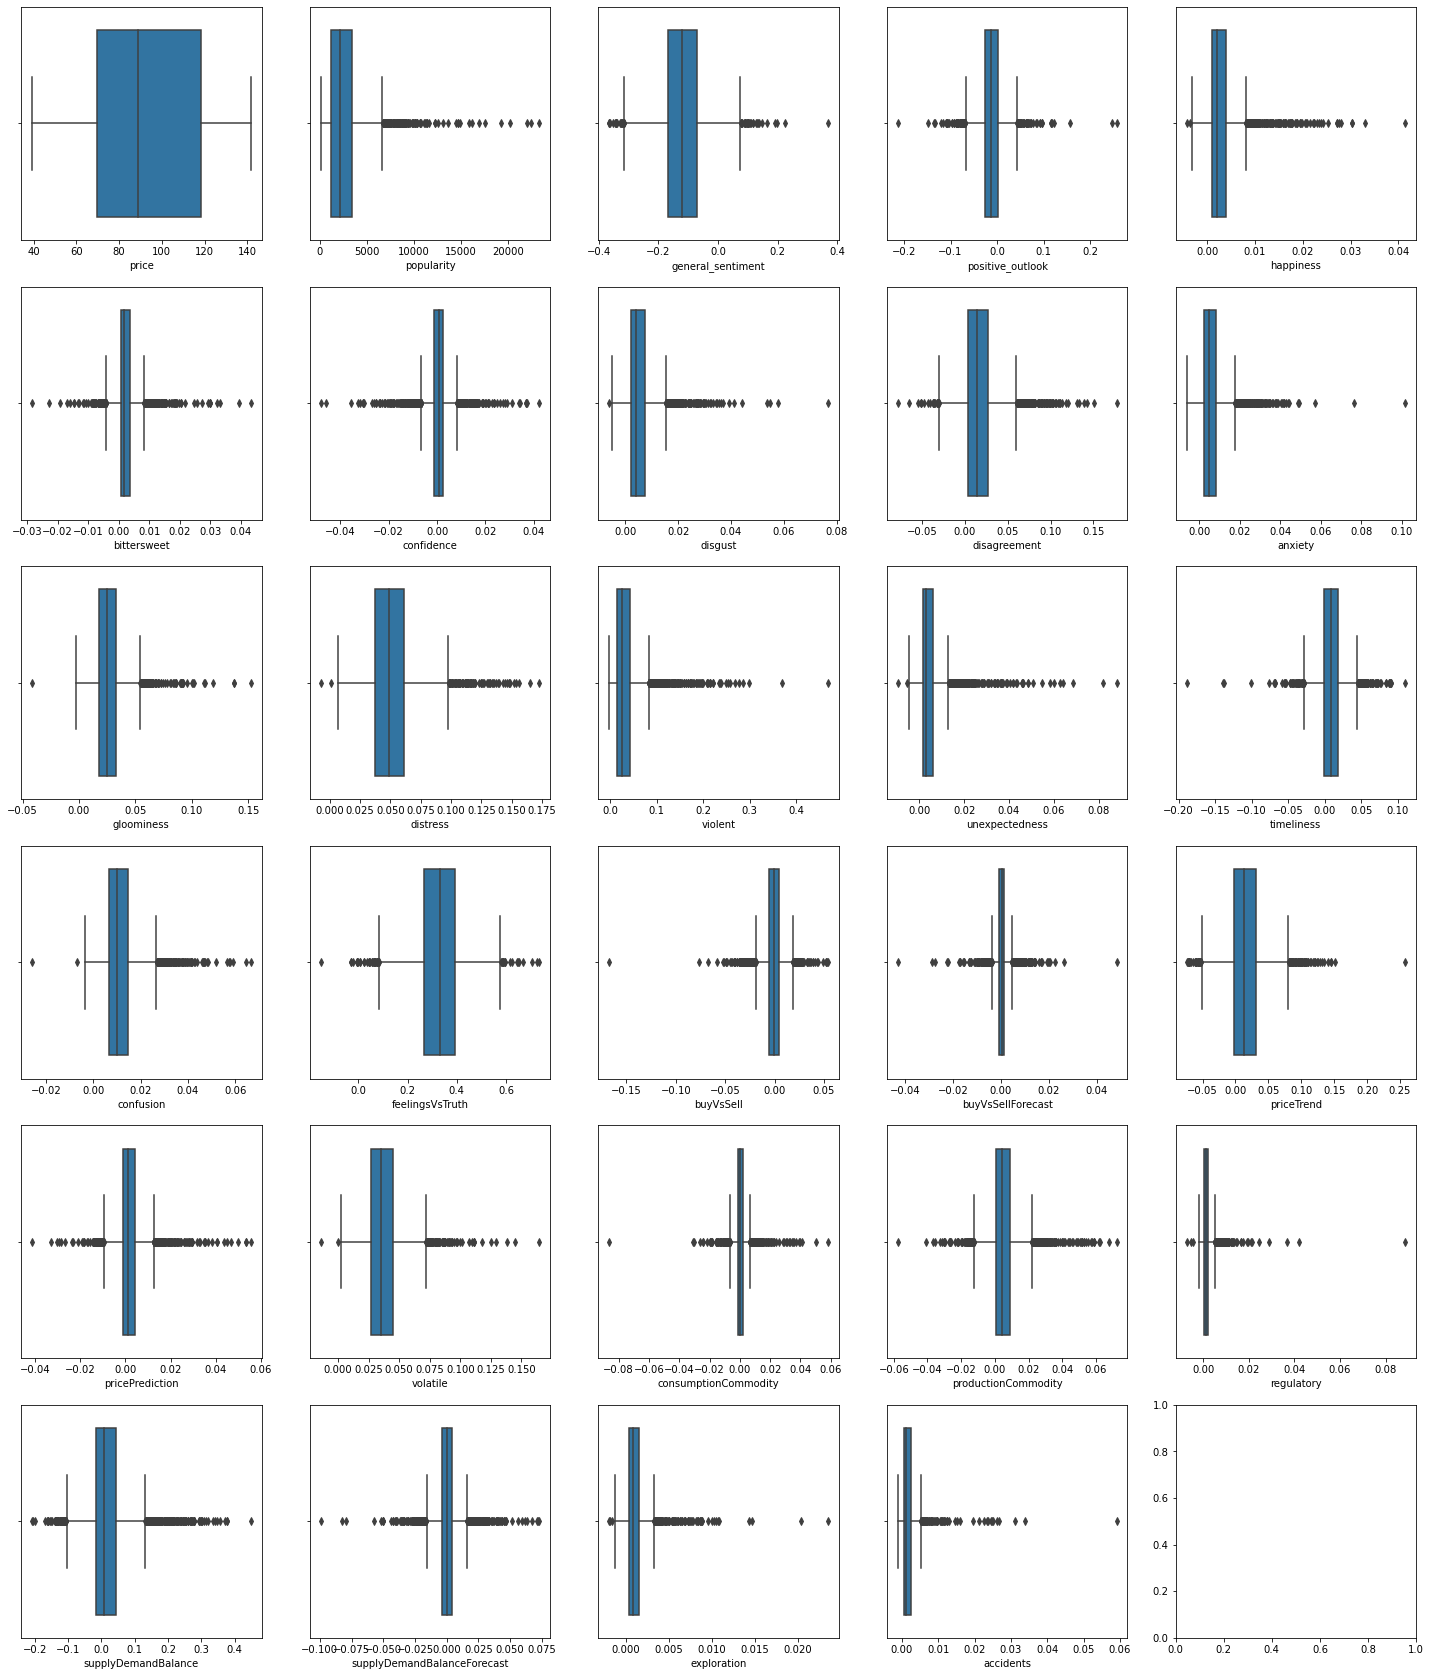

In [61]:
fig, ax = plt.subplots(nrows = rows, ncols = 5, figsize = (25, 30))
ax = ax.flatten()

for i, var in enumerate(df.iloc[:, df.columns != 'Date'].iteritems()):
    sns.boxplot(data= df, x= var[0], ax = ax[i])
    #ax[i].set_title(var[0])

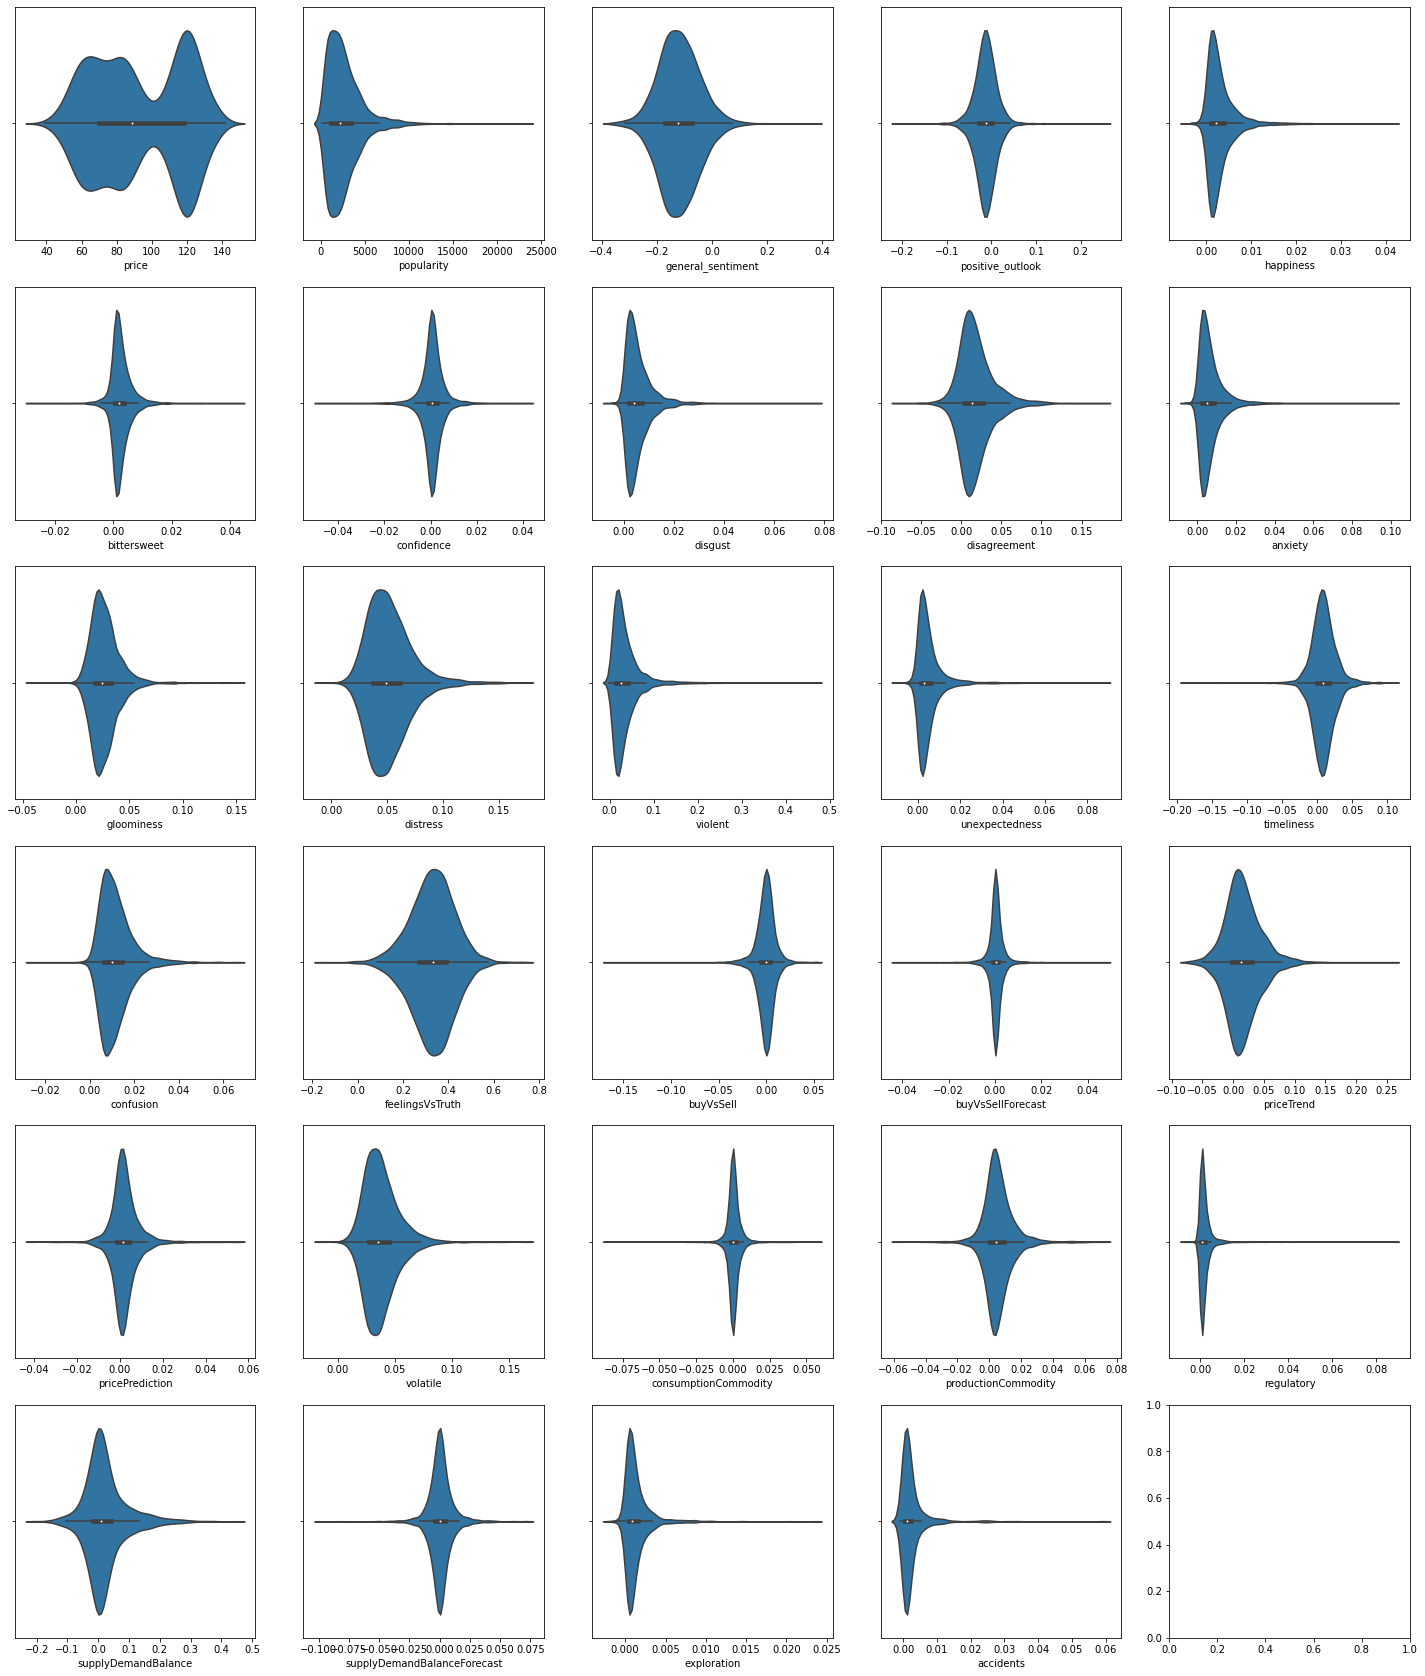

In [62]:
fig, ax = plt.subplots(ncols = 5, nrows = rows, figsize = (25,30))
ax = ax.flatten()

for i, var in enumerate(df.iloc[:, df.columns != 'Date'].iteritems()):
    sns.violinplot(data= df, x = var[1], ax = ax[i])

plt.show()

### Spot Some Early Correlations

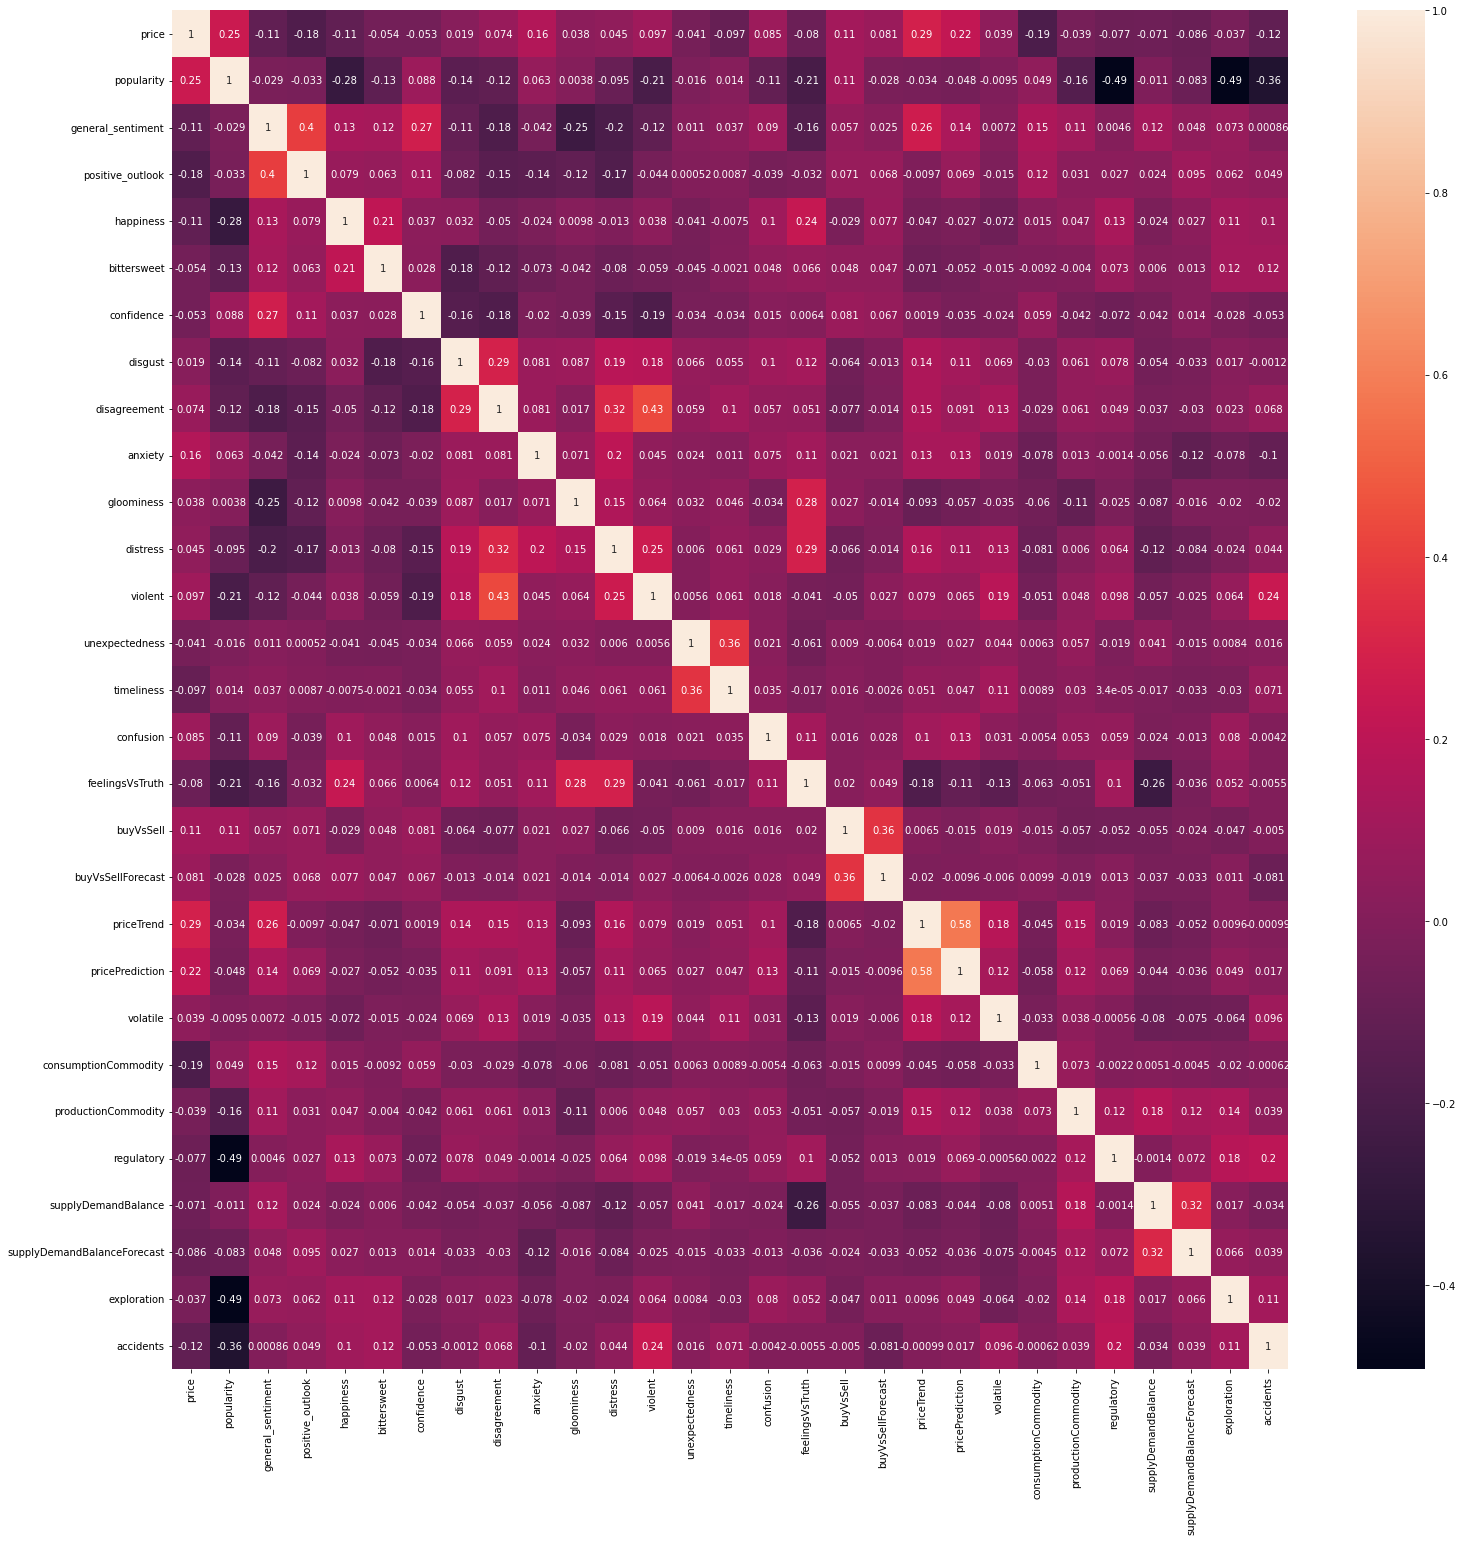

In [63]:
fig, ax = plt.subplots(figsize = (25,25))

sns.heatmap(data = df.corr(method="spearman"), annot = True, ax = ax)
plt.show()

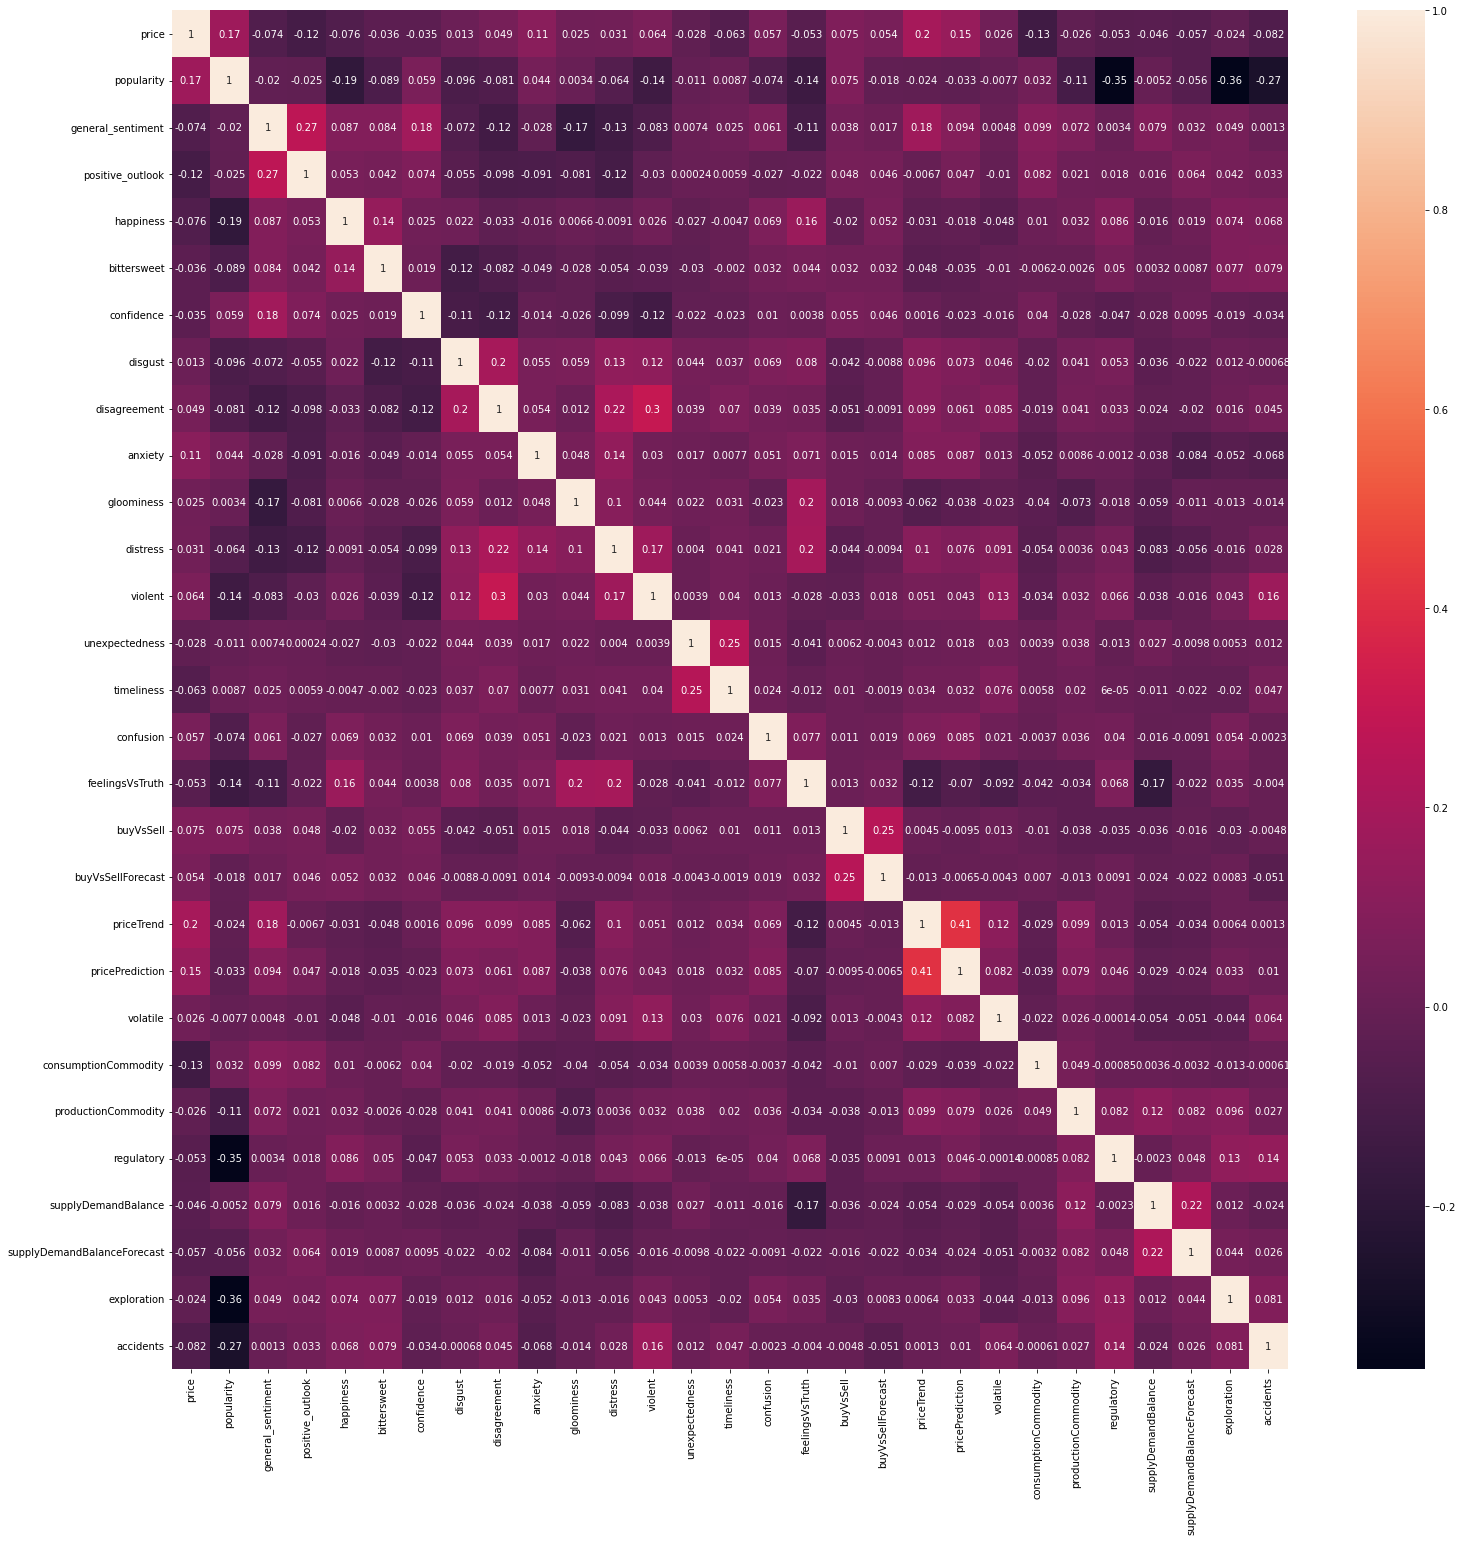

In [64]:
fig, ax = plt.subplots(figsize = (25,25))

sns.heatmap(data = df.corr(method="kendall"), annot = True, ax = ax)
plt.show()

In [65]:
df.corr(method="spearman").loc['price']

price                          1.000000
popularity                     0.252894
general_sentiment             -0.113631
positive_outlook              -0.178336
happiness                     -0.114185
bittersweet                   -0.054259
confidence                    -0.052745
disgust                        0.019216
disagreement                   0.073688
anxiety                        0.163218
gloominess                     0.038107
distress                       0.044939
violent                        0.096859
unexpectedness                -0.041307
timeliness                    -0.096903
confusion                      0.085079
feelingsVsTruth               -0.079816
buyVsSell                      0.111130
buyVsSellForecast              0.080617
priceTrend                     0.287702
pricePrediction                0.223116
volatile                       0.039424
consumptionCommodity          -0.193742
productionCommodity           -0.038519
regulatory                    -0.077440


In [66]:
df.corr(method="kendall").loc['price']

price                          1.000000
popularity                     0.170762
general_sentiment             -0.074460
positive_outlook              -0.117481
happiness                     -0.076089
bittersweet                   -0.035760
confidence                    -0.034679
disgust                        0.013178
disagreement                   0.048931
anxiety                        0.109961
gloominess                     0.025160
distress                       0.030916
violent                        0.064451
unexpectedness                -0.027547
timeliness                    -0.063094
confusion                      0.056853
feelingsVsTruth               -0.052867
buyVsSell                      0.074746
buyVsSellForecast              0.053540
priceTrend                     0.196502
pricePrediction                0.150459
volatile                       0.026160
consumptionCommodity          -0.129877
productionCommodity           -0.025864
regulatory                    -0.053117
